In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("../dropout/sonar.all-data",header=None)
df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
30,0.0240,0.0218,0.0324,0.0569,0.0330,0.0513,0.0897,0.0713,0.0569,0.0389,...,0.0162,0.0146,0.0093,0.0112,0.0094,0.0054,0.0019,0.0066,0.0023,R
164,0.0163,0.0198,0.0202,0.0386,0.0752,0.1444,0.1487,0.1484,0.2442,0.2822,...,0.0077,0.0026,0.0031,0.0083,0.0020,0.0084,0.0108,0.0083,0.0033,M
66,0.0265,0.0440,0.0137,0.0084,0.0305,0.0438,0.0341,0.0780,0.0844,0.0779,...,0.0038,0.0187,0.0156,0.0068,0.0097,0.0073,0.0081,0.0086,0.0095,R
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M
32,0.0195,0.0213,0.0058,0.0190,0.0319,0.0571,0.1004,0.0668,0.0691,0.0242,...,0.0157,0.0074,0.0271,0.0203,0.0089,0.0095,0.0095,0.0021,0.0053,R


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [7]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [8]:
df[60]=df[60].map({'M':1,'R':0})
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop(columns=60, axis=1)
y = df[60]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [11]:
X_train.shape

(156, 60)

In [12]:
y_train.values

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0], dtype=int64)

In [13]:
type(X_train)

pandas.core.frame.DataFrame

In [14]:
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [17]:
type(X_train)

numpy.ndarray

In [24]:
##Convert the numpy array to tensor
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test =torch.tensor(y_test, dtype=torch.long)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

torch.Size([156, 60])
torch.Size([156])
torch.Size([52, 60])
torch.Size([52])


C:\Users\Anirudh\AppData\Local\Temp\ipykernel_19304\3435202190.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train = torch.tensor(X_train, dtype=torch.float32)
C:\Users\Anirudh\AppData\Local\Temp\ipykernel_19304\3435202190.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test = torch.tensor(X_test, dtype=torch.float32)
C:\Users\Anirudh\AppData\Local\Temp\ipykernel_19304\3435202190.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
C:\Users\Anirudh\AppData\Local\Temp\ipykernel

In [25]:
#Create Tensor Datasets
train_data=TensorDataset(X_train,y_train)
test_data=TensorDataset(X_test,y_test)

In [26]:
#Create DataLoader
train_loader=DataLoader(train_data,batch_size=16,shuffle=True)
test_loader=DataLoader(test_data,batch_size=16,shuffle=True)

In [27]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Linear(60,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,2)#Final output without activation for classification
            
        )

    def forward(self,x):
        return self.network(x)

In [28]:
##Training the model
def train_model(model,train_loader,val_loader,criterion,optimizer,epochs=20):
    train_losses,val_losses,val_accuracies=[],[],[]
    for epoch in range(epochs):
        model.train()
        running_loss=0.0
        for inputs,labels in train_loader:
            optimizer.zero_grad()
            outputs=model(inputs)
            labels=labels.long()
            loss=criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
        train_losses.append(running_loss/len(train_loader))
        model.eval()
        val_loss=0.0
        y_pred,y_true=[],[]
        with torch.no_grad():
            for inputs,labels in val_loader:
                outputs=model(inputs)
                loss=criterion(outputs,labels)
                val_loss+=loss.item()
                _,predicted=torch.max(outputs.data,1)
                y_pred.extend(predicted.cpu().numpy())
                y_true.extend(labels.cpu().numpy())
        val_losses.append(val_loss/len(val_loader))
        val_accuracy=accuracy_score(y_true,y_pred)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f} - Val Accuracy: {val_accuracies[-1]:.4f}")

    return train_losses,val_losses,val_accuracies

Epoch 1/20 - Train Loss: 0.6876 - Val Loss: 0.6907 - Val Accuracy: 0.5192
Epoch 2/20 - Train Loss: 0.6740 - Val Loss: 0.6865 - Val Accuracy: 0.5192
Epoch 3/20 - Train Loss: 0.6602 - Val Loss: 0.6408 - Val Accuracy: 0.6731
Epoch 4/20 - Train Loss: 0.6418 - Val Loss: 0.6462 - Val Accuracy: 0.6731
Epoch 5/20 - Train Loss: 0.6110 - Val Loss: 0.6288 - Val Accuracy: 0.8269
Epoch 6/20 - Train Loss: 0.5796 - Val Loss: 0.5711 - Val Accuracy: 0.7885
Epoch 7/20 - Train Loss: 0.5363 - Val Loss: 0.5733 - Val Accuracy: 0.7308
Epoch 8/20 - Train Loss: 0.4953 - Val Loss: 0.4741 - Val Accuracy: 0.8077
Epoch 9/20 - Train Loss: 0.4716 - Val Loss: 0.5300 - Val Accuracy: 0.7885
Epoch 10/20 - Train Loss: 0.4808 - Val Loss: 0.5162 - Val Accuracy: 0.7115
Epoch 11/20 - Train Loss: 0.4384 - Val Loss: 0.5373 - Val Accuracy: 0.7115
Epoch 12/20 - Train Loss: 0.4399 - Val Loss: 0.4383 - Val Accuracy: 0.7115
Epoch 13/20 - Train Loss: 0.4025 - Val Loss: 0.4620 - Val Accuracy: 0.7692
Epoch 14/20 - Train Loss: 0.3773 -

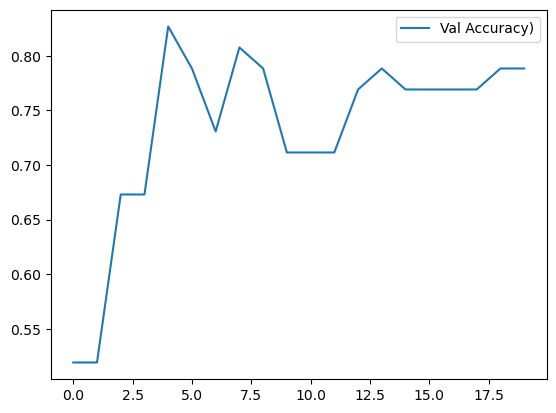

In [ ]:
model=SimpleNN()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

train_losses,val_losses,val_accuracies=train_model(model,train_loader,test_loader,criterion,optimizer,epochs=20)


# plt.plot(train_losses,label="Train Loss)")
# plt.plot(val_losses,label="Val Loss)")
plt.plot(val_accuracies,label="Val Accuracy)")
plt.legend()
plt.show()

In [32]:
##As you can see the accuracy is reducing,feels like there's no point of runningg extra epochs

### Train the model with early Stopping

In [ ]:
##Training the model
def train_model_early_stop(model,train_loader,val_loader,criterion,optimizer,epochs=20):

    patience=3
    best_accuracy=0
    counter=0

    train_losses,val_losses,val_accuracies=[],[],[]
    for epoch in range(epochs):
        model.train()
        running_loss=0.0
        for inputs,labels in train_loader:
            optimizer.zero_grad()
            outputs=model(inputs)
            labels=labels.long()
            loss=criterion(outputs,labels)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
        train_losses.append(running_loss/len(train_loader))##average of the whole batch loss
        
        model.eval()
        val_loss=0.0
        y_pred,y_true=[],[]
        with torch.no_grad():
            for inputs,labels in val_loader:
                outputs=model(inputs)
                loss=criterion(outputs,labels)
                val_loss+=loss.item()
                _,predicted=torch.max(outputs.data,1)
                y_pred.extend(predicted.cpu().numpy())
                y_true.extend(labels.cpu().numpy())
        val_losses.append(val_loss/len(val_loader))
        val_accuracy=accuracy_score(y_true,y_pred)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_losses[-1]:.4f} - Val Loss: {val_losses[-1]:.4f} - Val Accuracy: {val_accuracies[-1]:.4f}")

        if(val_accuracy>best_accuracy):
            best_accuracy=val_accuracy
            counter=0
            torch.save(model.state_dict(),"best_model.pt")
        else:
            counter+=1
            if(counter>=patience):
                print("Early Stopping at Epoch ",epoch+1)
                break
           

    return train_losses,val_losses,val_accuracies

Epoch 1/20 - Train Loss: 0.6870 - Val Loss: 0.6822 - Val Accuracy: 0.5192
Epoch 2/20 - Train Loss: 0.6742 - Val Loss: 0.6723 - Val Accuracy: 0.5192
Epoch 3/20 - Train Loss: 0.6636 - Val Loss: 0.6648 - Val Accuracy: 0.6538
Epoch 4/20 - Train Loss: 0.6420 - Val Loss: 0.6149 - Val Accuracy: 0.6538
Epoch 5/20 - Train Loss: 0.6130 - Val Loss: 0.6291 - Val Accuracy: 0.6731
Epoch 6/20 - Train Loss: 0.5991 - Val Loss: 0.5857 - Val Accuracy: 0.6731
Epoch 7/20 - Train Loss: 0.5617 - Val Loss: 0.5465 - Val Accuracy: 0.7692
Epoch 8/20 - Train Loss: 0.5108 - Val Loss: 0.5147 - Val Accuracy: 0.7308
Epoch 9/20 - Train Loss: 0.4800 - Val Loss: 0.4915 - Val Accuracy: 0.7500
Epoch 10/20 - Train Loss: 0.4593 - Val Loss: 0.4560 - Val Accuracy: 0.7692
Early Stopping at Epoch  10


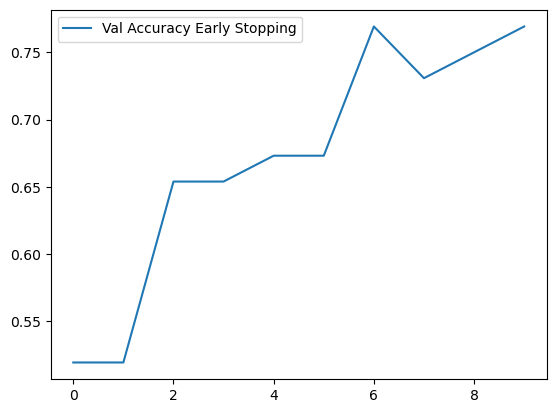

In [40]:
model=SimpleNN()
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

train_losses,val_losses,val_accuracies=train_model_early_stop(model,train_loader,test_loader,criterion,optimizer,epochs=20)


# plt.plot(train_losses,label="Train Loss)")
# plt.plot(val_losses,label="Val Loss)")
plt.plot(val_accuracies,label="Val Accuracy Early Stopping")
plt.legend()
plt.show()

In [41]:
model.load_state_dict(torch.load("best_model.pt"))

<All keys matched successfully>

In [44]:
model.eval()
val_loss=0.0
y_pred,y_true=[],[]
with torch.no_grad():
    for inputs,labels in test_loader:
        outputs=model(inputs)
        loss=criterion(outputs,labels)
        val_loss+=loss.item()
        _,predicted=torch.max(outputs.data,1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())
    val_losses.append(val_loss/len(test_loader))
    val_accuracy=accuracy_score(y_true,y_pred)
val_accuracy

0.7692307692307693